# Week 13 Exercises


## Ex1: PCA on MNIST Digits
In this exercise we will experiment with PCA on digits.

1. Run PCA on the training data train_dat http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html (use n_components = 784) and use ``plot_images`` to plot the 20 directions with largest variance. Use this PCA model for all subsequent computations. The directions can be found with the attribute ``components_``.
2. Take the first 20 data points from the training data and project them onto the first $k$ components for $k \in \{1, 2,4,8,16, 32, 64\}$. Then plot them as images. What do you see?
    **Hint:** To project them compute the length of the projection of each point onto the first $k$ directions and then compute for each image compute the linear combination of the first $k$ directions given by these directions ($XZZ^\intercal$ as in lecture).
3. Map all the training data train_dat to 2D (the length of the projection on the first two directions) and make a scatter plot where you color with the label and see if there is some structure (use scatter with ``cmap = plt.cm.Paired``, like ``ax.scatter(x,y, c=lab, cmap=plt.cm.Paired)``)
4. Map all training data train_dat to $32$ dimensions and train an SGD Classifier. Observe the test accuracy of the classifier. How should you select target dimension in real life?
Use the following classifer (svm loss): ``clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)``

Discuss the results. Are they what you expect? Why? Why not.

100%|██████████| 9912422/9912422 [00:03<00:00, 2975888.40it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 3326531.09it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

First 20 directions (eigenvectors X^T X)


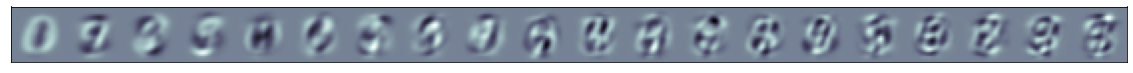

Original images:


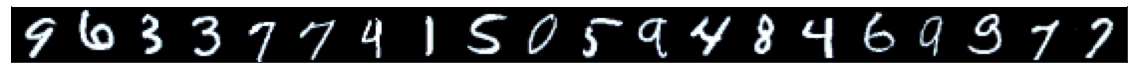

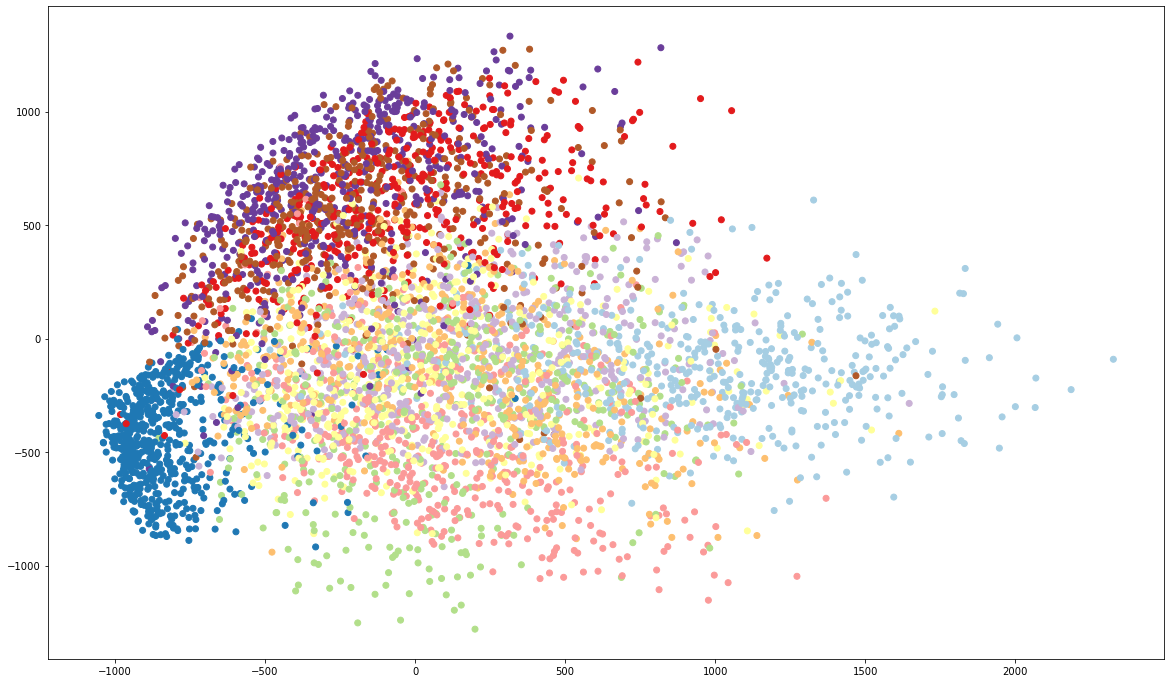

Test accuracy:  0.736
Test Accuracy of 32 Dim PCA: 52.0
Test Accuracy original: 86.9


In [5]:
# ## PCA on digits
# In this exercise we will experiment with PCA on digits.

# 1. Run PCA on the training data train_dat http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html (use n_components = 784) and use ``plot_images`` to plot the 20 directions with largest variance. Use this PCA model for all subsequent computations. The directions can be found with the attribute ``components_``.
# 2. Take the first 20 data points from the training data and project them onto the first $k$ components for $k \in \{1, 2,4,8,16, 32, 64\}$. Then plot them as images. What do you see?
#     **Hint:** To project them compute the length of the projection of each point onto the first $k$ directions and then compute for each image compute the linear combination of the first $k$ directions given by these directions (XZZ^T as in lecture).
# 3. Map all the training data train_dat to 2D (the length of the projection on the first two directions) and make a scatter plot where you color with the label and see if there is some structure (use scatter with ``cmap = plt.cm.Paired``, like ``ax.scatter(x,y, c=lab, cmap=plt.cm.Paired)``)
# 4. Map all training data train_dat to $32$ dimensions and train an SGD Classifier. Observe the test accuracy of the classifier. How should you select target dimension in real life?
#    Use the following classifer (svm loss): ``clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)``

# Discuss the results. Are they what you expect? Why? Why not.


# %matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
import torchvision.datasets as datasets

# Load full dataset
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)



def plot_images(dat, k=20, size=28):
    """ Plot the first k vectors as 28 x 28 images """
    x2 = dat[0:k,:].reshape(-1, size, size)
    x2 = x2.transpose(1, 0, 2)
    fig, ax = plt.subplots(figsize=(20,12))
    ax.imshow(x2.reshape(size, -1), cmap='bone')
    ax.set_yticks([])
    ax.set_xticks([])
    plt.show()

#data, labels =
data = mnist_trainset.data.numpy().reshape((60000, 28*28))
labels = mnist_trainset.targets.numpy()

# reduce size for speed
rp = np.random.permutation(len(labels))
train_dat = data[rp[:5000],:]
test_dat = data[rp[5000:6000], :]
train_lab = labels[rp[:5000]]
test_lab = labels[rp[5000:6000]]

components = None
## TASK 1
### YOUR CODE HERE
pca = PCA(n_components=784)
pca.fit(train_dat)
components = pca.components_

### END CODE
print('First 20 directions (eigenvectors X^T X)')
plot_images(components, 20)

## TASK 2
# take the first 20 data point and project them onto the first k components and plot for k in [1, 2,4,8,16, 32, 64]
img = train_dat[0:20, :]
print('Original images:')
plot_images(img, 20)
for k in [1, 2, 4, 8, 16, 32, 64]:
    ### YOUR CODE HERE
    proj = pca.transform(img)[:, :k]
    proj = proj.dot(pca.components_[:k, :])

    ### END CODE
    
# map the data to 2D and plot the results colored by label
proj = None
## TASK 3
### YOUR CODE HERE
proj = pca.transform(train_dat)[:, :2]
### END CODE
fig, ax = plt.subplots(figsize=(20, 12))
ax.scatter(proj[:,0], proj[:,1], c=train_lab, cmap=plt.cm.Paired)
plt.show()

## TASK 4
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)
### YOUR CODE HERE
proj = pca.transform(train_dat)[:, :32]
clf.fit(proj, train_lab)
proj = pca.transform(test_dat)[:, :32]
print('Test accuracy: ', clf.score(proj, test_lab))

### END CODE

clf_original = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)
clf_original.fit(train_dat, train_lab)

proj_test_dat = test_dat @ components[0:32].T
acc = (clf.predict(proj_test_dat) == test_lab).mean()
print('Test Accuracy of 32 Dim PCA:', 100*acc)
print('Test Accuracy original:',100*((clf_original.predict(test_dat) == test_lab).mean()))


In [4]:
!pip install torchvision

  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.12.1


## Ex2: Dimensionality Reduction with Autoencoder

Write an autoencoder in pytorch and use it to compute a dimensionality reduction for the MNIST digits (as used in PCA exercise) to $k$ numbers (hidden layer size). 
Then compare to PCA by plotting the reconstructed data points

Technically you must complete the autoencoder class below.
* Implement cost, encode and decode in the AutoEncoder class.      
    For n data points with dimension d the cost is 
    $$
    \frac{1}{dn} \sum_{i=1}^n \sum_{j=1}^d (x_{i, j} - \hat{x}_{i, j})^2 
    $$
    where $\hat{x} = \textrm{dec}(\textrm{enc}(x))$ the result of encoding and then decoding $x$. Note that we normalize by $1/dn$ and not just $1/n$ like in the lecture. This is purely a practical choice that makes it easier to deal with learning rates.
    Let $k$ denote the hidden layer size then:
    - The encoder is given as  $\textrm{enc}(x) = \textrm{relu}(x W_1 + b_1)$, where $W_1$ is a matrix of size (784, k) and $b_1$ is of size (1, k)
    - Similarly the decoder is $\textrm{dec}(x) = (x W_2 + b_2)$ where $W_2$ is a matrix of size (k, 784) and $b_2$ is of size (1, 784)
* Test the code by running simple_test and set hidden size to 16 and epochs to at least 10. It may take some time to actually fit. 

In the first cell we load the MNIST OCR data in pytorch way and show how to use the data iterators.
The autoencoder class is in the next



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torch import optim
from torchvision import datasets, transforms
import torch.nn as nn
import numpy as np

def plot_images(dat, k=16):
    """ Plot the first k vectors as 28 x 28 images """
    size = 28 
    x2 = dat[0:k,:].reshape(-1, size, size)
    x2 = x2.transpose(1, 0, 2)
    fig, ax = plt.subplots(figsize=(20, 12))
    ax.imshow(x2.reshape(size, -1), cmap='bone')
    ax.set_yticks([])
    ax.set_xticks([])
    plt.show()


transform=transforms.Compose([
    transforms.ToTensor(),
    #transforms.Normalize((0.1307,), (0.3081,))
])

batch_size = 16
dataset1 = datasets.MNIST('../data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1, batch_size=batch_size, shuffle=False)
# works like this 
for idx, (X, y) in enumerate(train_loader):
    x_vec = X.reshape(-1, 784)
    print('Input Images')
    plot_images(x_vec.numpy(), k=x_vec.shape[0]) # move to numpy only relevant when needing data in that format
    if idx > 5:
        break
    



In [ ]:


class AutoEncoder():
    
    def __init__(self):
        """ The parameters required to be set by fit method """
        self.W1 = None
        self.b1 = None
        self.W2 = None
        self.b2 = None

    def cost(self, X, W1, b1, W2, b2):
        """ Compute (coordinate-wise) Least Squares Loss of reconstructing the input.
        The clamp function may be useful
        
          X: torch.tensor shape (n, d) - Data
          W1: torch.tensor shape (d, h) - weights
          b1: torch.tensor shape (1, h) - bias weight
          W2: torch.tensor shape (h, d) - weights
          b2: torch.tensor shape (1, d) - bias weight
        returns pytorch tensor with least squared cost
        """
   
        loss = None
        ### YOUR CODE HERE
        ### END CODE
        return loss
    
    def fit(self, data_loader, hidden_size=32, epochs=5):   
        """ GD Learning Algorithm with pytorch
        
         Args:
         data_loader: torch dataloader allows enumeration over data
         hidden_size: int
         epochs: int 
         
         sets 
        """
        def my_init(s_to, s_from):
            """ Standard way to initialize matrices in neural nets - you can ignore it """
            w = torch.zeros(s_to, s_from)
            b = torch.zeros(s_to, 1)
            nn.init.kaiming_uniform_(w, a=np.sqrt(5))
            bound = 1 / np.sqrt(s_from)
            nn.init.uniform_(b, -bound, bound)
            return torch.transpose(w, 1, 0), torch.transpose(b, 1, 0)        
        
        W1, b1 = my_init(hidden_size, 784)
        W2, b2 = my_init(784, hidden_size)
        for i, z in enumerate([W1, b1, W2, b2]):
            z.requires_grad_()

        sgd = optim.SGD(params={W1, b1, W2, b2}, lr=0.1, weight_decay=1e-4)
        #sgd = optim.AdamW(params={W1, b1, W2, b2}, lr=0.0001, weight_decay=1e-4)
        running_loss = 0.0

        for epoch in range(epochs):
            epoch_loss = 0
            epoch_count = 0
            running_loss = 0
            for idx, (X, y) in enumerate(data_loader):
                sgd.zero_grad()
                inputs = X.view(-1, 784) 
                loss = self.cost(inputs, W1, b1, W2, b2)
                epoch_loss += loss.item()
                epoch_count += 1
                running_loss += loss.item()
                if idx % 10 == 9:   
                    print('Running loss: {2:.3f}'.format(epoch + 1, idx + 1,  epoch_loss/epoch_count), end='\r')
                    running_loss = 0.0

                loss.backward()
                sgd.step()
            print('Epoch: {0}, Mean Least Square loss: {1}'.format(epoch + 1, epoch_loss/epoch_count))

        self.W1 = W1.detach() #.numpy()
        self.W2 = W2.detach() #.numpy()
        self.b1 = b1.detach() #.numpy()
        self.b2 = b2.detach() #.numpy()
        

    def encode(self, X):
        """ Compute the embedded inputs.
        
        Args:
         X: torch.tensor shape (n, d)
         
        Returns:
         decoded: torch.tensor shape (n, h) using self.W1, self.b1 and ReLU
        """

        encoded = None
        ### YOUR CODE HERE
        ### END CODE
        return encoded

    def decode(self, X):
        """ Compute the reconstructed inputs from the encoding.
        
        Args:
         X: torch.tensor shape (n, h)
         
        Returns:
         decoded: torch.tensor shape (n, d) using self.W2, self.b2
        """

        decoded = None
        ### YOUR CODE HERE
        ### END CODE
        return decoded
    
def simple_test(hidden_size=32, epochs=1):
    net = AutoEncoder()
    net.fit(data_loader=train_loader, hidden_size=hidden_size,  epochs=epochs)
    X_sample, y_sample =  next(iter(train_loader))
    print(X_sample.shape)
    x_vec = X_sample.view(-1, 784)
    with torch.no_grad():
        reconstructed_sample = net.decode(net.encode(x_vec)).numpy()
    print('Input Images')
    plot_images(x_vec.numpy(), k=x_vec.shape[0])    
    print('Reconstructed Images')
    plot_images(reconstructed_sample, k=x_vec.shape[0])
    
    #data, labels =
    data = dataset1.data.view(-1,784).type(torch.FloatTensor)
    labels = dataset1.targets
    # reduce size for speed
    rp = np.random.permutation(len(labels))
    train_dat = data[rp[:5000],:]
    test_dat = data[rp[5000:6000], :]
    train_lab = labels[rp[:5000]].numpy()
    test_lab = labels[rp[5000:6000]].numpy()
    
    enc_train_dat = net.encode(train_dat)
    clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)
    clf.fit(enc_train_dat, train_lab)
    enc_test_dat = net.encode(test_dat)
    acc = (clf.predict(enc_test_dat) == test_lab).mean()
    print('AutoEncoder of dimension',hidden_size)
    print('Test Accuracy using AutoEncoder:', 100*acc)
    

simple_test(32, epochs=10)

## Ex3: Random Projections Experiment
In the following, you must implement the random projection known as the Johnson-Lindenstrauss transform.

The code you must implement:
1. Fill out the random projection matrix Z such that a data matrix X can be embedded as XZ. Z should have the right scaling and normal distributed entries. Z should have k columns (the target dimension for embedding, called k in the lectures).
2. Project the training data using Z
3. Train the SGD classifier on the projected training data.


In [ ]:
import numpy as np
import os
from sklearn.linear_model import SGDClassifier
import torchvision.datasets as datasets

# Load full dataset
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

#data, labels =
data = mnist_trainset.data.numpy().reshape((60000, 28*28))
labels = mnist_trainset.targets.numpy()

# reduce size for speed
rp = np.random.permutation(len(labels))
dat = data[rp[:6000], :]
lab = labels[rp[:6000]]

train_dat = dat[:5000,:]
test_dat = dat[5000:, :]
train_lab = lab[:5000]
test_lab = lab[5000:]

for k in [16, 32, 64, 128]:
    clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)
    Z = None
    ### YOUR CODE HERE
    ### END CODE

    proj_test_dat = test_dat @ Z
    acc = (clf.predict(proj_test_dat) == test_lab).mean()
    print('Testing with embedding dimension',k)
    print('Test accuracy of JL', 100*acc)


## Ex4: Random Projections and Inner Products
Recall that the many linear models we have seen in the course base their predictions on inner products $w^\intercal x$. Moreover, recall from the lecture that the Johnson-Lindenstrauss transform guarantees (with high probability), for a set of feature vectors $x_1,\dots,x_n \in R^d$ that:
$$
\|f(x_i) - f(x_j)\|_2^2 \in (1 \pm \varepsilon)\|x_i - x_j\|_2^2
$$
for all $x_i, x_j$. In this exercise, you must show that the Johnson-Lindenstrauss transform also preserves inner products with high probability. For this, we make an assumption that $-x_i$ is among $x_1,\dots,x_n$ for every $x_i$.

1. Assume $x_i$ and $x_j$ have unit length. Show that $|f(x_i)^\intercal f(x_j) - x_i^\intercal x_j| \leq 2 \varepsilon$ when all distances are preserved to within $(1\pm \varepsilon)$. Hint: The identity $4 \langle a, b\rangle = \|a+b\|_2^2 - \|a-b\|_2^2$ may be useful. Also, for two unit vectors $a,b$ it holds that $\|a+b\|_2^2 \leq 4$ and $\|a-b\|_2^2 \leq 4$.

2. Assume the embedding $f$ is linear (like the construction in the lecture), i.e. $f(a v) = af(v)$ for constants $a$ and let $x_i$ and $x_j$ be arbitrary. Assume all distances are preserved to within $(1\pm \varepsilon)$. Show that $|f(x_i)^\intercal f(x_j) - x_i^\intercal x_j| \leq 2 \varepsilon \|x_i\|\|x_j\|$.


## Ex5: Random Projections and Support Vector Machines
Recall from the support vector machines lectures that in the linearly separable case, we search for a hyperplane $w$ with the largest margin to the data. Assume there is such a hyperplane (let us ignore the bias $b$), specified by the normal vector $w$ of unit length, where the margin (geometric and functional since $\|w\| = 1$) to every training example is at least $\gamma$. Assume furthermore that every training example $x_i$ has norm at most $R$.

Show that a random projection into $k=C((R/\gamma)^2 \ln n)$ dimensions, for a big enough constant $C>0$, guarantees that the data is still linearly separable with high probability. Hint: It may be useful to use the properties proved in exercise 4 above and to use $\varepsilon = \gamma/(2R)$.

We remark that since the VC-dimension of hyperplanes is $d+1$, the reduction to $k$ dimensions shows that a much smaller VC-dimension might suffice if there exists a separating hyperplane $w$ with large margins in $R^d$.
